In [1]:
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

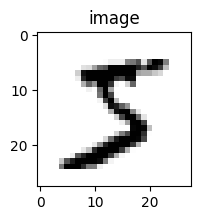

图像数据形状和对应数据为: (28, 28)
图像标签形状和对应数据为: (1,) [5]

打印第一个图像,对应标签数字[5]


In [2]:
train_dataset = paddle.vision.datasets.MNIST(mode='train')
train_data_0 = np.array(train_dataset[0][0])
train_label_0 = np.array(train_dataset[0][1])
import matplotlib.pyplot as plt
plt.figure('Image')
plt.figure(figsize=(2,2))
plt.imshow(train_data_0,cmap=plt.cm.binary)
plt.axis('on')
plt.title('image')
plt.show()
print("图像数据形状和对应数据为:",train_data_0.shape)
print("图像标签形状和对应数据为:",train_label_0.shape,train_label_0)
print("\n打印第一个图像,对应标签数字{}".format(train_label_0))

In [3]:
class MNIST(paddle.nn.Layer):
    def __init__ (self):
        super(MNIST,self). __init__ ()
#定义一层全连接层，输出维度是1
        self.fc = paddle.nn.Linear(in_features=784, out_features=1)
    def forward(self,inputs):
        outputs = self.fc(inputs)
        return outputs

In [4]:
model=MNIST()
def train(model):
    model.train()
    train_loader=paddle.io.DataLoader(paddle.vision.datasets.MNIST(mode='train'),batch_size=16,shuffle=True)
    opt=paddle.optimizer.SGD(learning_rate=0.001,parameters=model.parameters())

In [5]:
def norm_img(img):
    assert len(img.shape)==3
    batch_size,img_h,img_w=img.shape[0],img.shape[1],img.shape[2]
    img=img/255
    img=paddle.reshape(img,[batch_size,img_h*img_w])
    return img

In [6]:
import paddle
paddle.vision.set_image_backend('cv2')
model = MNIST()

def train(model):
    model.train()
    train_loader = paddle.io.DataLoader(paddle.vision.datasets.MNIST(mode = 'train'),
                                        batch_size  = 16,
                                        shuffle = True)
    opt = loader = paddle.optimizer.SGD(learning_rate=0.001,parameters=model.parameters())
    EPOCH_NUM = 10
    loss_list = []
    for epoch in range(EPOCH_NUM):
        for batch_id,data in enumerate(train_loader()):
            images = norm_img(data[0]).astype('float32')
            labels = data[1].astype('float32')
            predicts = model(images)
            loss = F.square_error_cost(predicts,labels)
            avg_loss = paddle.mean(loss)
            if batch_id % 1000 ==0:
                loss = avg_loss.numpy()[0]
                loss_list.append(loss)
                print("epoch_id:{},batch_id:{},loss is:{}".format(epoch,batch_id,loss))
            avg_loss.backward()
            opt.step()
            opt.clear_grad()
    return loss_list
loss_list = train(model)
paddle.save(model.state_dict(),'mnist.pdparams')

epoch_id:0,batch_id:0,loss is:26.25975799560547
epoch_id:0,batch_id:1000,loss is:3.2272095680236816
epoch_id:0,batch_id:2000,loss is:3.216188430786133
epoch_id:0,batch_id:3000,loss is:2.7049338817596436
epoch_id:1,batch_id:0,loss is:3.687009572982788
epoch_id:1,batch_id:1000,loss is:2.610074043273926
epoch_id:1,batch_id:2000,loss is:3.5530714988708496
epoch_id:1,batch_id:3000,loss is:1.308315634727478
epoch_id:2,batch_id:0,loss is:6.866661071777344
epoch_id:2,batch_id:1000,loss is:4.7189531326293945
epoch_id:2,batch_id:2000,loss is:3.2400636672973633
epoch_id:2,batch_id:3000,loss is:5.359704971313477
epoch_id:3,batch_id:0,loss is:3.9876561164855957
epoch_id:3,batch_id:1000,loss is:5.122686862945557
epoch_id:3,batch_id:2000,loss is:2.950389862060547
epoch_id:3,batch_id:3000,loss is:3.1525862216949463
epoch_id:4,batch_id:0,loss is:1.4428927898406982
epoch_id:4,batch_id:1000,loss is:1.6219481229782104
epoch_id:4,batch_id:2000,loss is:2.9804036617279053
epoch_id:4,batch_id:3000,loss is:4.3

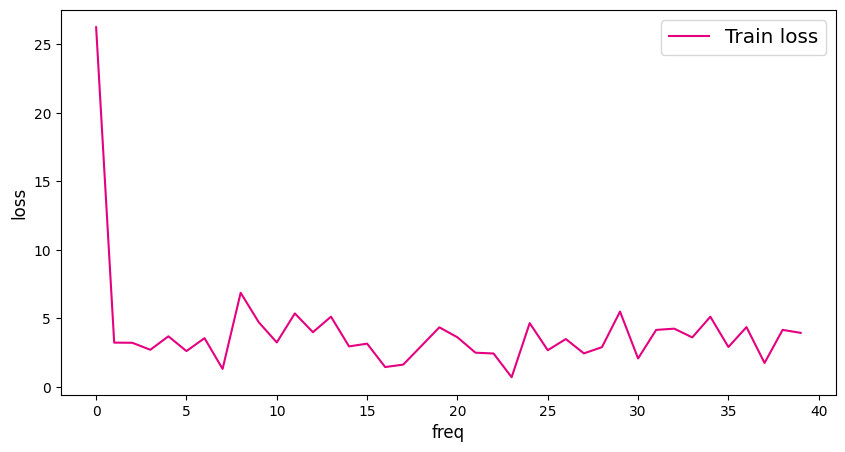

In [7]:
def plot(loss_list):
    plt.figure(figsize=(10,5))
    freqs = [i for i in range(len(loss_list))]
    plt.plot(freqs,loss_list,color='#e4007f',label='Train loss')
    plt.ylabel("loss",fontsize='large')
    plt.xlabel("freq",fontsize='large')
    plt.legend(loc='upper right',fontsize='x-large')
    plt.show()
plot(loss_list)

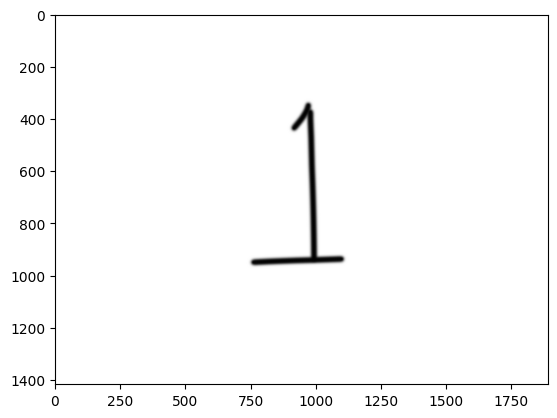

原始图像shape: (1417, 1890)


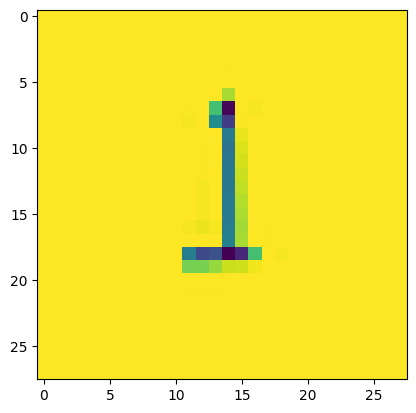

采样后图片shape: (28, 28)


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
img_path = 'D:/.work/school/deep learn/example_1.jpg'
im = Image.open(img_path)
plt.imshow(im)
plt.show()
im = im.convert('L')
print('原始图像shape:',np.array(im).shape)
im = im.resize((28,28),Image.ADAPTIVE)
plt.imshow(im)
plt.show()
print("采样后图片shape:",np.array(im).shape)

In [21]:
def load_image(img_path):
    im=Image.open(img_path).convert('L')
    im=im.resize((28,28),Image.ADAPTIVE)
    im=np.array(im).reshape(1,-1).astype(np.float32)
    im=1-im/255
    return im
model=MNIST()
params_file_path='D:/.work/school/deep learn/mnist.pdparams'
img_path='D:/.work/school/deep learn/example_1.jpg'
param_dict=paddle.load(params_file_path)
model.load_dict(param_dict)
model.eval()
tensor_img=load_image(img_path)
result=model(paddle.to_tensor(tensor_img))
print('result',result)
print("本次预测的数字是",result.numpy().astype('int32'))
print("本次预测的数字是",result.numpy().astype('int32'))
print("本次预测的数字是",result.numpy().astype('int32'))
print("本次预测的数字是",result.numpy().astype('int32'))
print("本次预测的数字是",result.numpy().astype('int32'))
print("本次预测的数字是",result.numpy().astype('int32'))
print("本次预测的数字是",result.numpy().astype('int32'))
print("本次预测的数字是",result.numpy().astype('int32'))
print("本次预测的数字是",result.numpy().astype('int32'))

result Tensor(shape=[1, 1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[2.71888137]])
本次预测的数字是 [[2]]
本次预测的数字是 [[2]]
本次预测的数字是 [[2]]
本次预测的数字是 [[2]]
本次预测的数字是 [[2]]
本次预测的数字是 [[2]]
本次预测的数字是 [[2]]
本次预测的数字是 [[2]]
本次预测的数字是 [[2]]
